In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from gensim.summarization.bm25 import get_bm25_weights
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords 
import sklearn
import math
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min,jaccard_similarity_score
from sklearn.metrics.pairwise import cosine_similarity as cosu, euclidean_distances
from pylab import savefig
from tqdm import tqdm

In [2]:
f=open("ChildCancer.txt", "r")

In [3]:
filename=f.name
file_name=filename.split('.')

In [4]:
data=(f.read())
print(data)

CHICAGO  — Cancer doesn’t doom youngsters to a miserable childhood, new research suggests, finding that after treatment, many are just as happy and well-adjusted as those who never had the illness — sometimes even more.

The findings, based on interviews with 8- to 12-year-olds, show how resilient youngsters can be even when facing something as frightening as cancer.

The results also indicate that children’s perceptions often differ from those of their parents, whose own negative feelings about the experience may shade how they think their children are coping, the researchers said.

“What we are finding is very reassuring,” said Dr. Smita Bhatia, lead author and a pediatric cancer specialist at City of Hope National Medical Center in Duarte, Calif.

Parents should be encouraged to know that young survivors “can indeed put their cancer behind them,” she said.

The study appears in February’s edition of the journal Pediatrics, published Monday.

‘Guarded by God’
Sebastian Sanchez-Luege,

In [5]:
data=[data]

In [6]:
sentences=[]
for s in data:
    sentences.append(sent_tokenize(s))
sentences = [[y] for x in sentences for y in x] # flatten list

In [7]:
sentences

[['CHICAGO  — Cancer doesn’t doom youngsters to a miserable childhood, new research suggests, finding that after treatment, many are just as happy and well-adjusted as those who never had the illness — sometimes even more.'],
 ['The findings, based on interviews with 8- to 12-year-olds, show how resilient youngsters can be even when facing something as frightening as cancer.'],
 ['The results also indicate that children’s perceptions often differ from those of their parents, whose own negative feelings about the experience may shade how they think their children are coping, the researchers said.'],
 ['“What we are finding is very reassuring,” said Dr. Smita Bhatia, lead author and a pediatric cancer specialist at City of Hope National Medical Center in Duarte, Calif.\n\nParents should be encouraged to know that young survivors “can indeed put their cancer behind them,” she said.'],
 ['The study appears in February’s edition of the journal Pediatrics, published Monday.'],
 ['‘Guarded by

In [8]:
(len(sentences))

23

In [9]:
sentences[0]

['CHICAGO  — Cancer doesn’t doom youngsters to a miserable childhood, new research suggests, finding that after treatment, many are just as happy and well-adjusted as those who never had the illness — sometimes even more.']

In [10]:
word_sentence=[]
for i in sentences:
    for j in i:
        word_sentence.append(word_tokenize(j))
word_sentence

[['CHICAGO',
  '—',
  'Cancer',
  'doesn',
  '’',
  't',
  'doom',
  'youngsters',
  'to',
  'a',
  'miserable',
  'childhood',
  ',',
  'new',
  'research',
  'suggests',
  ',',
  'finding',
  'that',
  'after',
  'treatment',
  ',',
  'many',
  'are',
  'just',
  'as',
  'happy',
  'and',
  'well-adjusted',
  'as',
  'those',
  'who',
  'never',
  'had',
  'the',
  'illness',
  '—',
  'sometimes',
  'even',
  'more',
  '.'],
 ['The',
  'findings',
  ',',
  'based',
  'on',
  'interviews',
  'with',
  '8-',
  'to',
  '12-year-olds',
  ',',
  'show',
  'how',
  'resilient',
  'youngsters',
  'can',
  'be',
  'even',
  'when',
  'facing',
  'something',
  'as',
  'frightening',
  'as',
  'cancer',
  '.'],
 ['The',
  'results',
  'also',
  'indicate',
  'that',
  'children',
  '’',
  's',
  'perceptions',
  'often',
  'differ',
  'from',
  'those',
  'of',
  'their',
  'parents',
  ',',
  'whose',
  'own',
  'negative',
  'feelings',
  'about',
  'the',
  'experience',
  'may',
  'shade'

In [11]:
#removal of stop words
stop_words = set(stopwords.words('english')) 
line=[]
filtered_sentence=[]

for i in word_sentence:
    for j in i:
        if not j in stop_words:
            line.append(j)
    filtered_sentence.append(line)
    line=[]



In [12]:
filtered_sentence[0]

['CHICAGO',
 '—',
 'Cancer',
 '’',
 'doom',
 'youngsters',
 'miserable',
 'childhood',
 ',',
 'new',
 'research',
 'suggests',
 ',',
 'finding',
 'treatment',
 ',',
 'many',
 'happy',
 'well-adjusted',
 'never',
 'illness',
 '—',
 'sometimes',
 'even',
 '.']

In [13]:
#stemming the words
from nltk.stem import PorterStemmer 
ps = PorterStemmer()
stemmed_sentences=[]
line=[]
for i in filtered_sentence:
    for j in i:
       line.append(ps.stem(j))
    stemmed_sentences.append(line)
    line=[]

In [14]:
# remove punctuations, numbers and special characters
alphabetic_sentences=[]
line=[]
for i in stemmed_sentences:
    line.append(pd.Series(i).str.replace("[^a-zA-Z]", " "))
    
    
    alphabetic_sentences.append(line)
    line=[]

In [15]:
line = []

for i in alphabetic_sentences:
   
    for j in i:
        l=[]
        for x in j.values:
            if not x ==' ':
                l.append(x.lower())
        line.append(l)
line

[['chicago',
  'cancer',
  'doom',
  'youngster',
  'miser',
  'childhood',
  'new',
  'research',
  'suggest',
  'find',
  'treatment',
  'mani',
  'happi',
  'well adjust',
  'never',
  'ill',
  'sometim',
  'even'],
 ['the',
  'find',
  'base',
  'interview',
  '  ',
  '   year old',
  'show',
  'resili',
  'youngster',
  'even',
  'face',
  'someth',
  'frighten',
  'cancer'],
 ['the',
  'result',
  'also',
  'indic',
  'children',
  'percept',
  'often',
  'differ',
  'parent',
  'whose',
  'neg',
  'feel',
  'experi',
  'may',
  'shade',
  'think',
  'children',
  'cope',
  'research',
  'said'],
 ['what',
  'find',
  'reassur',
  'said',
  'dr ',
  'smita',
  'bhatia',
  'lead',
  'author',
  'pediatr',
  'cancer',
  'specialist',
  'citi',
  'hope',
  'nation',
  'medic',
  'center',
  'duart',
  'calif ',
  'parent',
  'encourag',
  'know',
  'young',
  'survivor',
  'inde',
  'put',
  'cancer',
  'behind',
  'said'],
 ['the',
  'studi',
  'appear',
  'februari',
  'edit',
  '

In [16]:
words=[]
words=[y for x in line for y in x ]

#Taking all distinct words in an array
Distinct_Words=[y for y in set(words)]

In [17]:
len(Distinct_Words)

231

In [18]:

len(words)

355

# Data Visulaizaton

In [19]:
for i in range(len(Distinct_Words)):
    print (i,Distinct_Words[i])
    

0 with
1 youngster
2 one
3 day
4 bhatia
5 flock
6 parent
7 rang
8 what
9 goal
10 young
11 she
12 rate
13 target
14 long term
15 restrict
16 amaz
17 overal
18 produc
19 less
20 mother
21 diseas
22 counti
23 intraven
24 issu
25 risen
26 death
27 cancer
28 ill
29 treat
30 life
31 suffer
32 result
33 earlier
34 doom
35 averag
36 differ
37 gruel
38 fear
39 publish
40 mari
41 kind
42 lou
43 monday
44 patient
45 also
46 childhood
47 physic
48 sebastian
49 dr 
50 psycholog
51 behind
52 nightmar
53 function
54 inferior
55 might
56 make
57 center
58 show
59 shade
60 often
61 i
62 mouth
63 adjust
64 base
65 favor
66 cancer fre
67 mid     
68 expect
69 journal
70 remain
71 american
72 focus
73 institut
74 worri
75 nation
76 research
77 orang
78 friend
79 massiv
80 dose
81 age
82 interview
83 inde
84 the
85 smita
86 recent
87 decad
88 accord
89 wrote
90 back
91 specialist
92 resili
93 chicago
94 rememb
95 estim
96 citi
97 group
98 normal
99 author
100 februari
101 distant
102 debilit
103 indic
104 

## Count representation


In [20]:
word_Count_matrix=np.empty(shape=(len(line),len(Distinct_Words)))
word_Count_matrix.fill(0)

for i in range(len(line)):
    for j in range(len(line[i])):
        for x in range(len(Distinct_Words)):
            if (Distinct_Words[x]==line[i][j]):
                word_Count_matrix[i][x] = word_Count_matrix[i][x] +1
                continue
                
word_Count_matrix

array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## BM-25

In [21]:
BM_25_weight=np.empty(shape=(len(line),len(Distinct_Words)))
BM_25_weight.fill(0)
    
    
avg_length=np.mean(word_Count_matrix.sum(axis=1))
    
length_size=np.array(1.5*word_Count_matrix.sum(axis=1)/avg_length)
    
isf=np.array(np.log(len(line)/np.count_nonzero(word_Count_matrix,axis=0)))

denominator=np.empty(shape=(len(line),len(Distinct_Words)))
for i in range(len(line)):
    denominator[i,:]=(word_Count_matrix[i,:]+length_size[i]+0.5)
    
BM_25_weight=(word_Count_matrix*isf)/(denominator)
BM_25_weight

array([[0.        , 0.53833199, 0.        , ..., 0.        , 0.        ,
        0.96497655],
       [0.        , 0.61148789, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## Tf-idf

In [22]:
tfidf_weight=np.empty(shape=(len(line),len(Distinct_Words)))
tfidf_weight.fill(0)

tfidf_weight = word_Count_matrix*isf
tfidf_weight

array([[0.        , 1.74919985, 0.        , ..., 0.        , 0.        ,
        3.13549422],
       [0.        , 1.74919985, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## Binary

In [23]:
word_binary_matrix=np.empty(shape=(len(line),len(Distinct_Words)))
word_binary_matrix.fill(0)

for i in range(len(line)):
    for j in range(len(line[i])):
        for x in range(len(Distinct_Words)):
            if (Distinct_Words[x]==line[i][j]):
                word_binary_matrix[i][x] = 1
                continue
word_binary_matrix

array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Similarities

## 1 Euclidean with BM25

In [24]:
euclidean_bm25 =euclidean_distances(BM_25_weight)
euclidean_bm25 = (1-(euclidean_bm25/np.max(euclidean_bm25)))
print(euclidean_bm25)

[[1.         0.16825969 0.12123426 0.13613219 0.09999698 0.1295899
  0.07423656 0.07902573 0.05300375 0.12503148 0.1110494  0.19032347
  0.13146235 0.10608829 0.22772035 0.09155654 0.20802219 0.18044729
  0.11919712 0.24118001 0.17010002 0.17196552 0.10395415]
 [0.16825969 1.         0.10042687 0.11552777 0.09558372 0.09132458
  0.05308311 0.0514093  0.03984534 0.10267978 0.09817018 0.11056012
  0.12100944 0.06433311 0.18677429 0.06785947 0.18339574 0.14766233
  0.09698983 0.21608274 0.12462289 0.13973366 0.06869518]
 [0.12123426 0.10042687 1.         0.12229085 0.09548629 0.10657214
  0.06801613 0.0578546  0.03499606 0.11142623 0.07863205 0.109881
  0.1204075  0.09508557 0.17996244 0.07580342 0.1865754  0.16775753
  0.09986422 0.21461746 0.16460264 0.12867428 0.11425547]
 [0.13613219 0.11552777 0.12229085 1.         0.10711169 0.12729793
  0.08713437 0.06897121 0.0447642  0.12379971 0.09187896 0.12439787
  0.14006112 0.07721486 0.17622662 0.06962108 0.19818806 0.16182378
  0.12090166 

## 2 Cosine with BM25

In [25]:
cosine_bm25=np.empty(shape=(len(line),len(line)))

for i in range(len(line)):
    for j in range(len(line)):
        dot_product = np.dot(BM_25_weight[i], BM_25_weight[j])
        norm_i = np.linalg.norm(BM_25_weight[i])
        norm_j = np.linalg.norm(BM_25_weight[j])
        cosine_bm25[i, j] = dot_product/(norm_i*norm_j)
cosine_bm25

array([[1.        , 0.13176082, 0.02430022, 0.03419751, 0.        ,
        0.03623448, 0.        , 0.01407153, 0.        , 0.        ,
        0.02985387, 0.13498832, 0.0090682 , 0.04420061, 0.11231392,
        0.02919127, 0.        , 0.02224465, 0.        , 0.01185607,
        0.05883772, 0.05405167, 0.03009236],
       [0.13176082, 1.        , 0.02626237, 0.03695883, 0.03725694,
        0.        , 0.        , 0.        , 0.0155939 , 0.        ,
        0.04778555, 0.00802391, 0.03530845, 0.        , 0.07069009,
        0.02326612, 0.        , 0.        , 0.        , 0.0128134 ,
        0.0066249 , 0.03197508, 0.        ],
       [0.02430022, 0.02626237, 1.        , 0.04553664, 0.03114202,
        0.02717245, 0.02572933, 0.00785143, 0.        , 0.01305343,
        0.        , 0.        , 0.02767958, 0.05916027, 0.04767657,
        0.03424968, 0.        , 0.04017099, 0.        , 0.        ,
        0.08942087, 0.        , 0.0900905 ],
       [0.03419751, 0.03695883, 0.04553664, 1.   

## 3 Euclidean with tfidf

In [26]:
euclidean_tfidf =euclidean_distances(tfidf_weight)
euclidean_tfidf = (1-(euclidean_tfidf/np.max(euclidean_tfidf)))
print(euclidean_tfidf)

[[1.         0.33968378 0.22792152 0.13548662 0.3403904  0.27561322
  0.16148939 0.22153872 0.22685429 0.37155795 0.22148559 0.3731442
  0.23405222 0.29250664 0.31769389 0.13546551 0.43039433 0.36789191
  0.27039406 0.41802578 0.28832745 0.33756394 0.31300018]
 [0.33968378 1.         0.25353805 0.15828529 0.38223287 0.28896947
  0.18501515 0.24125896 0.25819893 0.40330939 0.25260504 0.35912095
  0.27157375 0.30373733 0.33185331 0.15519278 0.46563038 0.39234332
  0.29755777 0.45246529 0.29576857 0.35885726 0.3309575 ]
 [0.22792152 0.25353805 1.         0.10304047 0.29976189 0.2267698
  0.13327176 0.17593559 0.1829616  0.32218449 0.16709561 0.27700494
  0.19942298 0.25220184 0.25895999 0.09926543 0.37210823 0.32487297
  0.22403462 0.35829122 0.25859195 0.26860109 0.2871891 ]
 [0.13548662 0.15828529 0.10304047 1.         0.19488569 0.14072909
  0.05852435 0.08521375 0.08862386 0.21438839 0.07794415 0.17587674
  0.11424218 0.13021059 0.13785455 0.         0.25347284 0.19937615
  0.13361202

## 4 Cosine with tfidf

In [27]:
cosine_tfidf=np.empty(shape=(len(line),len(line)))

for i in range(len(line)):
    for j in range(len(line)):
        dot_product = np.dot(tfidf_weight[i], tfidf_weight[j])
        norm_i = np.linalg.norm(tfidf_weight[i])
        norm_j = np.linalg.norm(tfidf_weight[j])
        cosine_tfidf[i, j] = dot_product/(norm_i*norm_j)
cosine_tfidf

array([[1.        , 0.13176082, 0.02398222, 0.03567907, 0.        ,
        0.03623448, 0.        , 0.01407153, 0.        , 0.        ,
        0.02886198, 0.13498832, 0.01116406, 0.04420061, 0.11100674,
        0.0269135 , 0.        , 0.02224465, 0.        , 0.01185607,
        0.05883772, 0.05736075, 0.03009236],
       [0.13176082, 1.        , 0.02591869, 0.03856003, 0.03725694,
        0.        , 0.        , 0.        , 0.0155939 , 0.        ,
        0.04619788, 0.00802391, 0.04346899, 0.        , 0.07912761,
        0.02145068, 0.        , 0.        , 0.        , 0.0128134 ,
        0.0066249 , 0.03575414, 0.        ],
       [0.02398222, 0.02591869, 1.        , 0.04708795, 0.03073448,
        0.02681686, 0.02825267, 0.00774868, 0.        , 0.0128826 ,
        0.        , 0.        , 0.03341262, 0.05838608, 0.07545671,
        0.03116396, 0.        , 0.05115783, 0.        , 0.        ,
        0.09650786, 0.        , 0.08891153],
       [0.03567907, 0.03856003, 0.04708795, 1.   

## 5 Euclidean with count

In [28]:
euclidean_count =euclidean_distances(word_Count_matrix)
euclidean_count = (1-(euclidean_count/np.max(euclidean_count)))
print(euclidean_count)

[[1.         0.37274995 0.21072766 0.1411025  0.33470086 0.26448412
  0.17022618 0.25342311 0.25342311 0.3598156  0.2425236  0.3994538
  0.20040994 0.32249251 0.25342311 0.15069942 0.41326131 0.33470086
  0.25342311 0.37274995 0.26448412 0.32249251 0.32249251]
 [0.37274995 1.         0.25342311 0.18016395 0.41326131 0.28712082
  0.21072766 0.27571403 0.32249251 0.41326131 0.3105003  0.37274995
  0.28712082 0.32249251 0.29871313 0.19022367 0.47209042 0.3598156
  0.29871313 0.42740167 0.28712082 0.37274995 0.34713745]
 [0.21072766 0.25342311 1.         0.10374184 0.3105003  0.2425236
  0.19022367 0.21072766 0.21072766 0.33470086 0.16040603 0.25342311
  0.16040603 0.27571403 0.19022367 0.13161163 0.3598156  0.3105003
  0.21072766 0.29871313 0.28712082 0.21072766 0.32249251]
 [0.1411025  0.18016395 0.10374184 1.         0.19022367 0.15069942
  0.12222338 0.12222338 0.10374184 0.23177872 0.09464254 0.18016395
  0.11293447 0.12222338 0.08563379 0.         0.23177872 0.15069942
  0.12222338 0

## 6 Cosine with count

In [29]:
cosine_count=np.empty(shape=(len(line),len(line)))

for i in range(len(line)):
    for j in range(len(line)):
        dot_product = np.dot(word_Count_matrix[i], word_Count_matrix[j])
        norm_i = np.linalg.norm(word_Count_matrix[i])
        norm_j = np.linalg.norm(word_Count_matrix[j])
        cosine_count[i, j] = dot_product/(norm_i*norm_j)
cosine_count

array([[1.        , 0.25197632, 0.05025189, 0.12309149, 0.        ,
        0.0571662 , 0.        , 0.05555556, 0.        , 0.        ,
        0.1028689 , 0.27216553, 0.0942809 , 0.12598816, 0.23112508,
        0.04454354, 0.        , 0.07106691, 0.        , 0.08333333,
        0.10814761, 0.1767767 , 0.06804138],
       [0.25197632, 1.        , 0.05698029, 0.13957263, 0.08908708,
        0.        , 0.        , 0.        , 0.06681531, 0.        ,
        0.17496355, 0.07715167, 0.21380899, 0.        , 0.26207121,
        0.05050763, 0.        , 0.        , 0.        , 0.09449112,
        0.06131393, 0.20044593, 0.        ],
       [0.05025189, 0.05698029, 1.        , 0.11134044, 0.07106691,
        0.10341754, 0.13055824, 0.05025189, 0.        , 0.0805823 ,
        0.        , 0.        , 0.08528029, 0.11396058, 0.1672484 ,
        0.0805823 , 0.        , 0.12856487, 0.        , 0.        ,
        0.24455799, 0.        , 0.18463724],
       [0.12309149, 0.13957263, 0.11134044, 1.   

## 7 Euclidean with binary

In [30]:
euclidean_binary =euclidean_distances(word_binary_matrix)
euclidean_binary = (1-(euclidean_binary/np.max(euclidean_binary)))
print(euclidean_binary)

[[1.         0.2854104  0.13705107 0.06600834 0.24206327 0.16206942
  0.08907342 0.14946825 0.14946825 0.27067504 0.174863   0.31583255
  0.174863   0.22815502 0.24206327 0.12481005 0.33156264 0.24206327
  0.22815502 0.2854104  0.16206942 0.24206327 0.22815502]
 [0.2854104  1.         0.1878581  0.1127379  0.33156264 0.1878581
  0.13705107 0.174863   0.22815502 0.33156264 0.25623156 0.2854104
  0.25623156 0.22815502 0.27067504 0.174863   0.39858323 0.27067504
  0.2854104  0.34767193 0.1878581  0.30045608 0.25623156]
 [0.13705107 0.1878581  1.         0.05468681 0.25623156 0.174863
  0.12481005 0.13705107 0.13705107 0.2854104  0.1127379  0.1878581
  0.16206942 0.21449298 0.14946825 0.13705107 0.31583255 0.22815502
  0.21449298 0.24206327 0.20106454 0.174863   0.27067504]
 [0.06600834 0.1127379  0.05468681 1.         0.14946825 0.07746879
  0.03244111 0.04349929 0.04349929 0.174863   0.04349929 0.1127379
  0.08907342 0.06600834 0.05468681 0.         0.20106454 0.1008278
  0.13705107 0.18

## 8 Cosine with binary

In [31]:
cosine_binary=np.empty(shape=(len(line),len(line)))

for i in range(len(line)):
    for j in range(len(line)):
        dot_product = np.dot(word_binary_matrix[i], word_binary_matrix[j])
        norm_i = np.linalg.norm(word_binary_matrix[i])
        norm_j = np.linalg.norm(word_binary_matrix[j])
        cosine_binary[i, j] = dot_product/(norm_i*norm_j)
cosine_binary

array([[1.        , 0.25197632, 0.05407381, 0.09072184, 0.        ,
        0.0571662 , 0.        , 0.05555556, 0.        , 0.        ,
        0.11111111, 0.27216553, 0.05892557, 0.12598816, 0.22866478,
        0.05270463, 0.        , 0.07106691, 0.        , 0.08333333,
        0.10814761, 0.13074409, 0.06804138],
       [0.25197632, 1.        , 0.06131393, 0.1028689 , 0.08908708,
        0.        , 0.        , 0.        , 0.06681531, 0.        ,
        0.18898224, 0.07715167, 0.13363062, 0.        , 0.19446112,
        0.05976143, 0.        , 0.        , 0.        , 0.09449112,
        0.06131393, 0.14824986, 0.        ],
       [0.05407381, 0.06131393, 1.        , 0.08830216, 0.07647191,
        0.11128298, 0.10012523, 0.05407381, 0.        , 0.086711  ,
        0.        , 0.        , 0.05735393, 0.12262787, 0.05564149,
        0.10259784, 0.        , 0.06917145, 0.        , 0.        ,
        0.21052632, 0.        , 0.19867985],
       [0.09072184, 0.1028689 , 0.08830216, 1.   

## 9 Jaccard with binary

In [32]:
def pairwise_jaccard(X):
    """Computes the Jaccard distance between the rows of `X`.
    """
    X = X.astype(bool).astype(int)

    intrsct = X.dot(X.T)
    row_sums = intrsct.diagonal()
    unions = row_sums[:,None] + row_sums - intrsct
    dist = intrsct / unions
    return dist

In [33]:
jaccard_binary = pairwise_jaccard(word_binary_matrix)
print(jaccard_binary)

[[1.         0.14285714 0.02777778 0.04651163 0.         0.02941176
  0.         0.02857143 0.         0.         0.05882353 0.15384615
  0.03030303 0.06666667 0.12903226 0.02702703 0.         0.03571429
  0.         0.04       0.05714286 0.06896552 0.03448276]
 [0.14285714 1.         0.03125    0.05128205 0.04545455 0.
  0.         0.         0.03448276 0.         0.10344828 0.04
  0.07142857 0.         0.10714286 0.03030303 0.         0.
  0.         0.04761905 0.03125    0.08       0.        ]
 [0.02777778 0.03125    1.         0.04545455 0.03703704 0.05882353
  0.05263158 0.02777778 0.         0.04       0.         0.
  0.02941176 0.06451613 0.02857143 0.05405405 0.         0.03448276
  0.         0.         0.11764706 0.         0.10714286]
 [0.04651163 0.05128205 0.04545455 1.         0.02857143 0.04761905
  0.04347826 0.02272727 0.         0.03030303 0.02272727 0.02631579
  0.04878049 0.         0.02325581 0.         0.         0.
  0.02777778 0.06060606 0.12195122 0.05263158 0.

## summary function

In [34]:
def summary_func(similarity_matrix,iter_num=np.random.randint(1000000)):
    summary=""
    n_clusters = int(np.ceil(len(similarity_matrix)**0.5))
    kmeans = KMeans(n_clusters=n_clusters, random_state=iter_num)
    kmeans = kmeans.fit(similarity_matrix)
    avg = []
    closest = []
    for j in range(n_clusters):
        idx = np.where(kmeans.labels_ == j)[0]
        avg.append(np.mean(idx))
    closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_,similarity_matrix)
    ordering = sorted(range(n_clusters), key=lambda k: avg[k])
    summary = ' '.join([sentences[closest[idx]][0] for idx in ordering])
    return summary

### summary function for many iterations

In [35]:
def summary_func_n_iter(similarity_matrix, similarity_metric_used, type_of_representation,no_of_iteration=1000):
    summary=""

    n_clusters = int(np.ceil(len(similarity_matrix)**0.5))
    
    
    sentences_cluster_check=np.empty(shape=(len(line),len(line)))
    sse=[]
    
    
    for i in tqdm(range(no_of_iteration)):
        kmeans= (KMeans(init="k-means++",n_clusters=n_clusters, random_state=i))
        kmeans = kmeans.fit(similarity_matrix)

        sse.append(kmeans.inertia_)

#         for i in range(len(kmeans.labels_)):
#             for j in range(len(kmeans.labels_)):
#                 if kmeans.labels_[i] == kmeans.labels_[j] and i!=j:
#                     sentences_cluster_check[i][j]+=1

    list_k = list(range(no_of_iteration))
    plt.figure(figsize=(12, 8),linewidth=0.001)
    plt.plot(list_k, sse, '-o')
    plt.plot((sse.index(min(sse))),min(sse),'s')
    value = " -- Iteration on which getting minimum sse = " + str(sse.index(min(sse)))
    plt.annotate(value,xy=((sse.index(min(sse))),(min(sse) )))
    plt.xlabel(r'Number of clusters *k*')
    plt.ylabel('Sum of squared distance')
    plt.title(similarity_metric_used + " on " + type_of_representation + " -Sum of Square distance over " + str(no_of_iteration)+ " times")
    plt.savefig((file_name[0]+" --------- "+similarity_metric_used + " "+ type_of_representation +" "+str(no_of_iteration)),dpi=300, bbox_inches = 'tight')
    return summary_func(similarity_matrix,sse.index(min(sse)))
    

# iterative approach to get better summary

### Cosine similarity with BM25 Representation Summary over 1000 iteration to get better summary

100%|██████████| 1000/1000 [00:25<00:00, 39.83it/s]


'CHICAGO  — Cancer doesn’t doom youngsters to a miserable childhood, new research suggests, finding that after treatment, many are just as happy and well-adjusted as those who never had the illness — sometimes even more. Dr. Mary Lou Schmidt, a pediatric cancer specialist at the University of Illinois at Chicago, said the study offers exciting insights into children’s feelings but also has limitations. “Through all of that, to me what is amazing is, he remembers good things,” Luege said. More than 75 percent of American children with cancer survive at least five years, compared with around 60 percent in the mid-1970s, according to the National Cancer Institute. Brain cancer survivors had lower overall scores than the control group.'

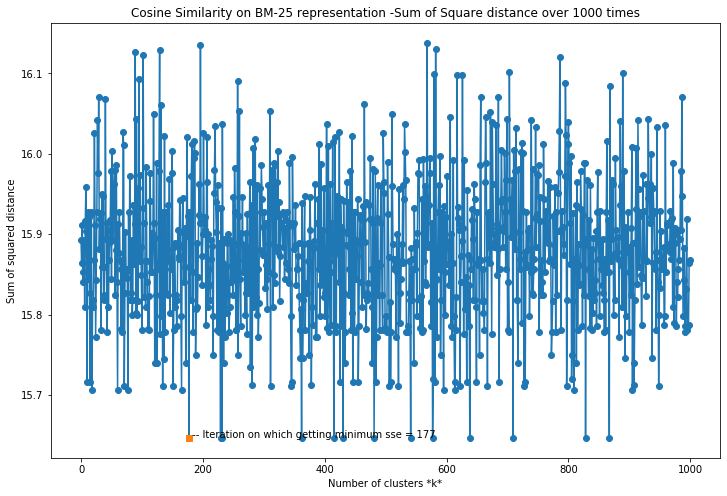

In [36]:
summary_func_n_iter(cosine_bm25,"Cosine Similarity","BM-25 representation")

### Cosine similarity with TFIDF Representation Summary over 1000 iteration to get better summary

100%|██████████| 1000/1000 [00:25<00:00, 39.29it/s]


'CHICAGO  — Cancer doesn’t doom youngsters to a miserable childhood, new research suggests, finding that after treatment, many are just as happy and well-adjusted as those who never had the illness — sometimes even more. Dr. Mary Lou Schmidt, a pediatric cancer specialist at the University of Illinois at Chicago, said the study offers exciting insights into children’s feelings but also has limitations. Now cancer-free, Sebastian underwent grueling treatment, including massive doses of radiation and chemotherapy and a stem-cell transplant in 2002, said his mother, Carmen Luege. More than 75 percent of American children with cancer survive at least five years, compared with around 60 percent in the mid-1970s, according to the National Cancer Institute. Brain cancer survivors had lower overall scores than the control group.'

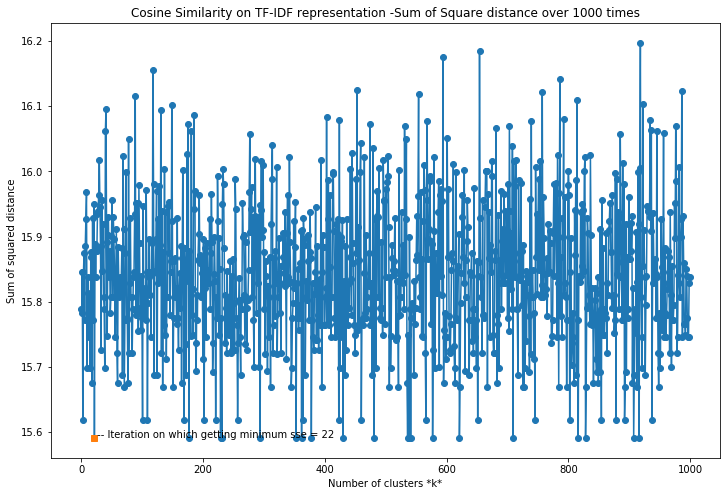

In [37]:
summary_func_n_iter(cosine_tfidf,"Cosine Similarity","TF-IDF representation")

### Cosine similarity with Binary Representation Summary over 1000 iteration to get better summary

100%|██████████| 1000/1000 [00:26<00:00, 38.12it/s]


'With improved treatments, survival rates for many childhood cancers have risen sharply in recent decades. The questions focused on physical issues, including pain and activity restrictions; psychological functioning, including fear of death, worrying and feeling inferior; and outlook on life, including happiness and optimism. ‘Guarded by God’\nSebastian Sanchez-Luege, a 9-year-old patient of Bhatia’s who was diagnosed with an aggressive lymphoma at age 6 but was not involved in the study, said he feels normal and happy. More than 75 percent of American children with cancer survive at least five years, compared with around 60 percent in the mid-1970s, according to the National Cancer Institute. Brain cancer survivors had lower overall scores than the control group.'

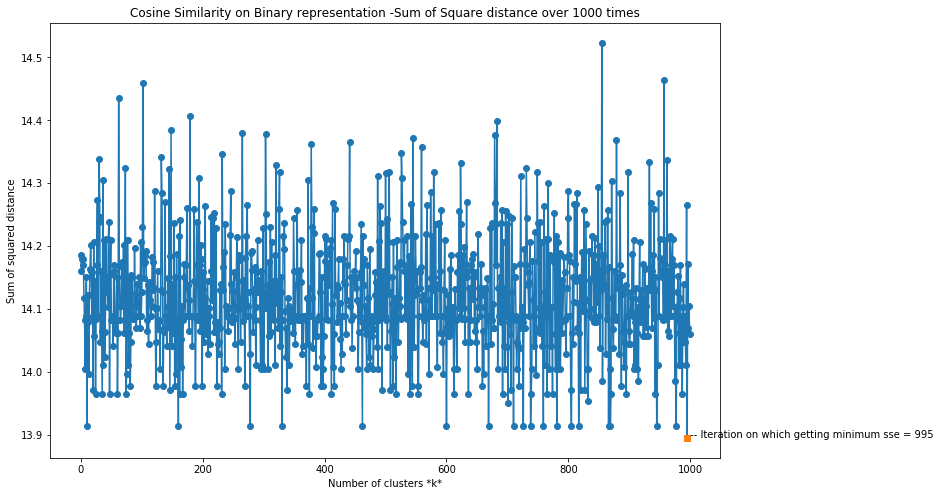

In [38]:
summary_func_n_iter(cosine_binary,"Cosine Similarity","Binary representation" )

### Cosine similarity with count Representation Summary over 1000 iteration to get better summary

100%|██████████| 1000/1000 [00:24<00:00, 41.62it/s]


'With improved treatments, survival rates for many childhood cancers have risen sharply in recent decades. The questions focused on physical issues, including pain and activity restrictions; psychological functioning, including fear of death, worrying and feeling inferior; and outlook on life, including happiness and optimism. “I kind of feel more guarded by God now,” said the Orange County, Calif., boy, “and maybe a little bit happier.” That’s partly because friends who were distant during his disease “now are like flocking over me,” he said. More than 75 percent of American children with cancer survive at least five years, compared with around 60 percent in the mid-1970s, according to the National Cancer Institute. Brain cancer survivors had lower overall scores than the control group.'

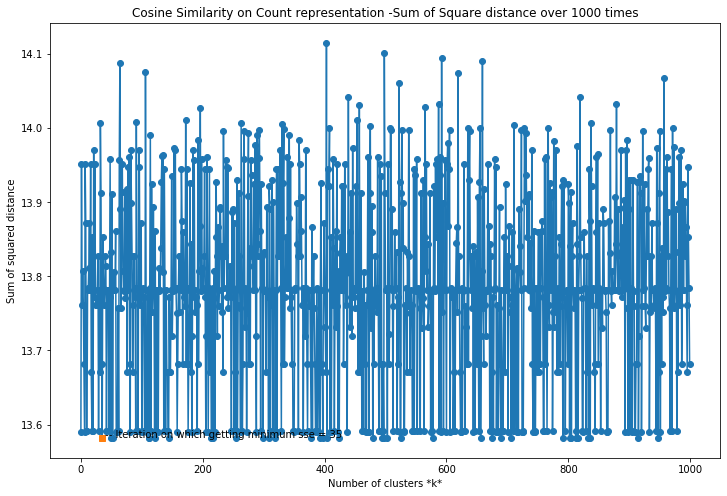

In [39]:
summary_func_n_iter(cosine_count,"Cosine Similarity","Count representation" )

### Euclidean similarity with Cosine Representation Summary over 1000 iteration to get better summary

100%|██████████| 1000/1000 [00:25<00:00, 39.81it/s]


'With improved treatments, survival rates for many childhood cancers have risen sharply in recent decades. She remembers him vomiting 10 times a day, suffering mouth sores so severe he couldn’t eat and taking morphine intravenously to dull the pain. Dr. Mary Lou Schmidt, a pediatric cancer specialist at the University of Illinois at Chicago, said the study offers exciting insights into children’s feelings but also has limitations. Now cancer-free, Sebastian underwent grueling treatment, including massive doses of radiation and chemotherapy and a stem-cell transplant in 2002, said his mother, Carmen Luege. Brain cancer survivors had lower overall scores than the control group.'

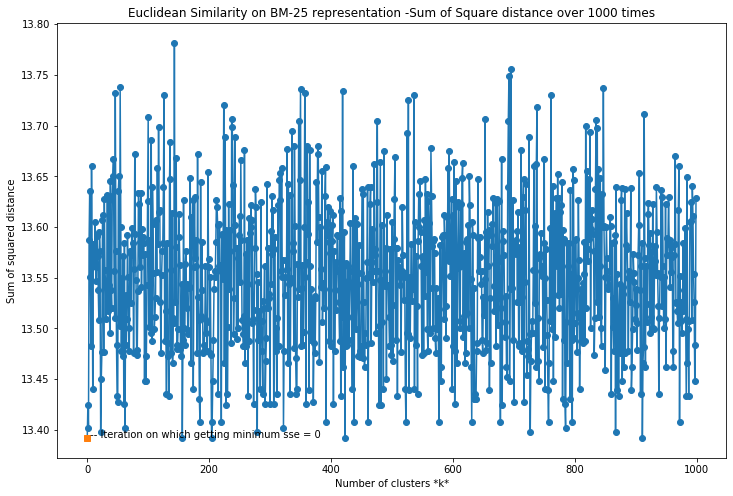

In [40]:
summary_func_n_iter(euclidean_bm25,"Euclidean Similarity","BM-25 representation" )

### euclidean similarity with TFIDF Representation Summary over 1000 iteration to get better summary

100%|██████████| 1000/1000 [00:23<00:00, 42.11it/s]


'“What we are finding is very reassuring,” said Dr. Smita Bhatia, lead author and a pediatric cancer specialist at City of Hope National Medical Center in Duarte, Calif.\n\nParents should be encouraged to know that young survivors “can indeed put their cancer behind them,” she said. “I kind of feel more guarded by God now,” said the Orange County, Calif., boy, “and maybe a little bit happier.” That’s partly because friends who were distant during his disease “now are like flocking over me,” he said. A more representative sample might have produced less favorable results, said Schmidt, who was not involved in the research. Brain cancer survivors had lower overall scores than the control group. The questions focused on physical issues, including pain and activity restrictions; psychological functioning, including fear of death, worrying and feeling inferior; and outlook on life, including happiness and optimism.'

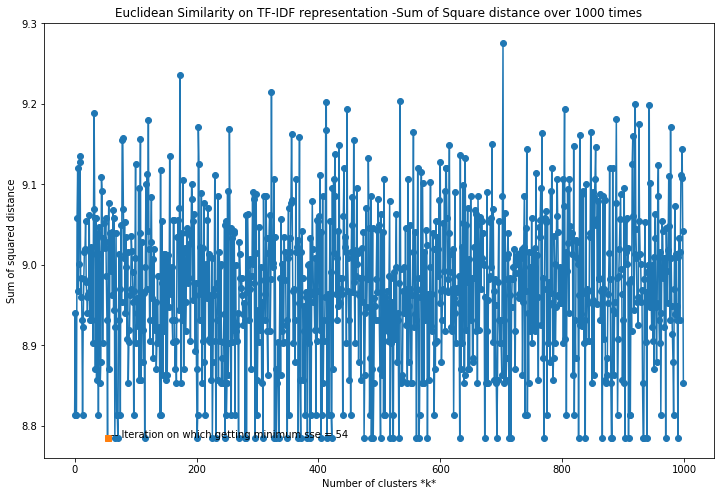

In [41]:
summary_func_n_iter(euclidean_tfidf,"Euclidean Similarity","TF-IDF representation" )

### Euclidean similarity with Binary Representation Summary over 1000 iteration to get better summary

100%|██████████| 1000/1000 [00:26<00:00, 37.94it/s]


'“What we are finding is very reassuring,” said Dr. Smita Bhatia, lead author and a pediatric cancer specialist at City of Hope National Medical Center in Duarte, Calif.\n\nParents should be encouraged to know that young survivors “can indeed put their cancer behind them,” she said. ‘Guarded by God’\nSebastian Sanchez-Luege, a 9-year-old patient of Bhatia’s who was diagnosed with an aggressive lymphoma at age 6 but was not involved in the study, said he feels normal and happy. With improved treatments, survival rates for many childhood cancers have risen sharply in recent decades. The questions focused on physical issues, including pain and activity restrictions; psychological functioning, including fear of death, worrying and feeling inferior; and outlook on life, including happiness and optimism. Brain cancer survivors had lower overall scores than the control group.'

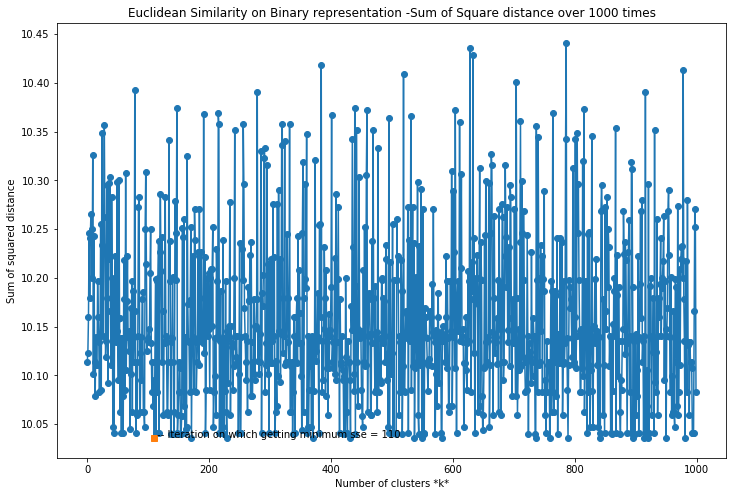

In [42]:
summary_func_n_iter(euclidean_binary,"Euclidean Similarity","Binary representation" )

### Euclidean similarity with Count Representation Summary over 1000 iteration to get better summary

100%|██████████| 1000/1000 [00:25<00:00, 39.41it/s]


'“What we are finding is very reassuring,” said Dr. Smita Bhatia, lead author and a pediatric cancer specialist at City of Hope National Medical Center in Duarte, Calif.\n\nParents should be encouraged to know that young survivors “can indeed put their cancer behind them,” she said. ‘Guarded by God’\nSebastian Sanchez-Luege, a 9-year-old patient of Bhatia’s who was diagnosed with an aggressive lymphoma at age 6 but was not involved in the study, said he feels normal and happy. They questioned 90 children who had been successfully treated for cancer at least a year earlier, 72 youngsters undergoing treatment, and a control group of 481 children who had never had cancer. Brain cancer survivors had lower overall scores than the control group. The questions focused on physical issues, including pain and activity restrictions; psychological functioning, including fear of death, worrying and feeling inferior; and outlook on life, including happiness and optimism.'

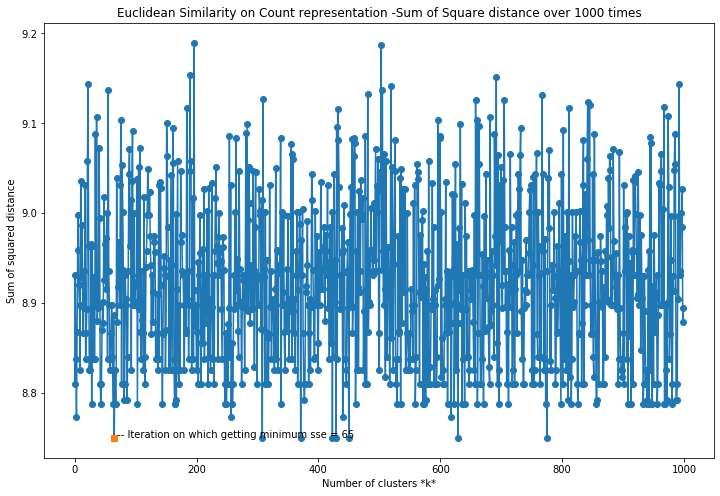

In [43]:
summary_func_n_iter(euclidean_count,"Euclidean Similarity","Count representation" )

### Jaccard similarity with Binary Representation Summary over 1000 iteration to get better summary

100%|██████████| 1000/1000 [00:24<00:00, 40.24it/s]


'“Through all of that, to me what is amazing is, he remembers good things,” Luege said. With improved treatments, survival rates for many childhood cancers have risen sharply in recent decades. Dr. Mary Lou Schmidt, a pediatric cancer specialist at the University of Illinois at Chicago, said the study offers exciting insights into children’s feelings but also has limitations. More than 75 percent of American children with cancer survive at least five years, compared with around 60 percent in the mid-1970s, according to the National Cancer Institute. Brain cancer survivors had lower overall scores than the control group.'

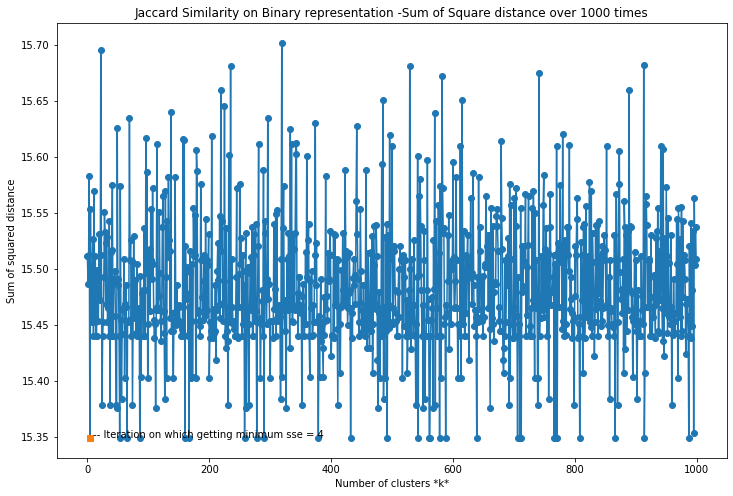

In [44]:
summary_func_n_iter(jaccard_binary,"Jaccard Similarity","Binary representation" )

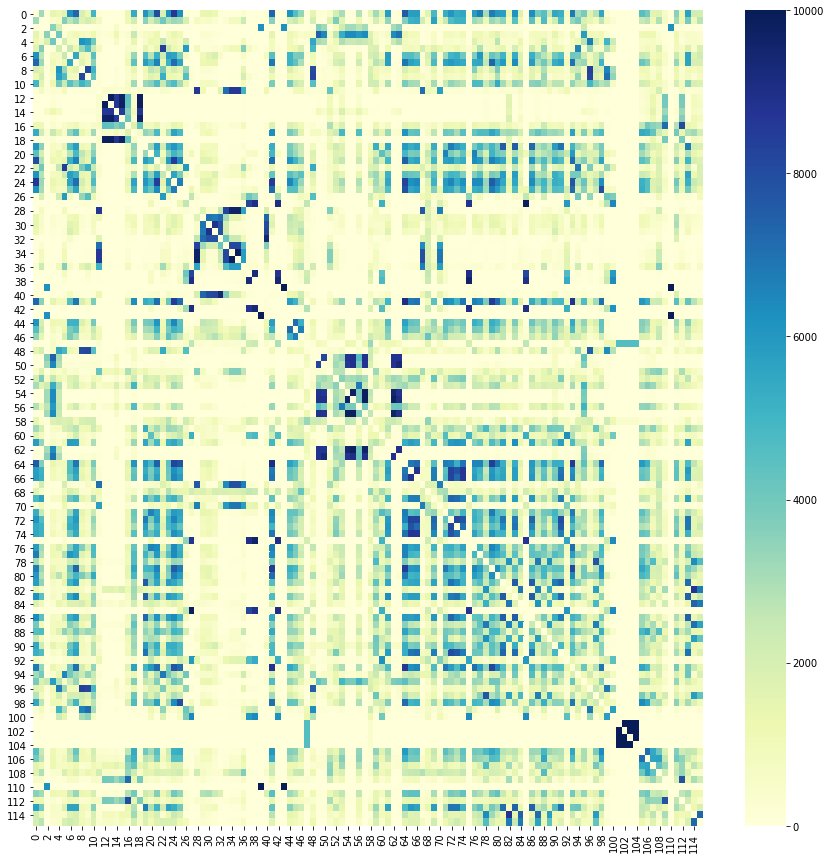

In [99]:
# f,ax = plt.subplots(figsize=(15, 15))
# fig=sns.heatmap(sentences_cluster_check, cmap="YlGnBu")

# figure = fig.get_figure()    
# figure.savefig('sse.png', dpi=50)

## normal summaries

## euclidean BM25 summary

In [45]:
euclidean_BM25_summary=summary_func(euclidean_bm25)
print(euclidean_BM25_summary)

Dr. Mary Lou Schmidt, a pediatric cancer specialist at the University of Illinois at Chicago, said the study offers exciting insights into children’s feelings but also has limitations. She remembers him vomiting 10 times a day, suffering mouth sores so severe he couldn’t eat and taking morphine intravenously to dull the pain. With improved treatments, survival rates for many childhood cancers have risen sharply in recent decades. ‘Guarded by God’
Sebastian Sanchez-Luege, a 9-year-old patient of Bhatia’s who was diagnosed with an aggressive lymphoma at age 6 but was not involved in the study, said he feels normal and happy. Brain cancer survivors had lower overall scores than the control group.


## cosine BM25 summary

In [46]:
cosine_BM25_summary=summary_func(cosine_bm25)
print(cosine_BM25_summary)

“Through all of that, to me what is amazing is, he remembers good things,” Luege said. CHICAGO  — Cancer doesn’t doom youngsters to a miserable childhood, new research suggests, finding that after treatment, many are just as happy and well-adjusted as those who never had the illness — sometimes even more. Dr. Mary Lou Schmidt, a pediatric cancer specialist at the University of Illinois at Chicago, said the study offers exciting insights into children’s feelings but also has limitations. More than 75 percent of American children with cancer survive at least five years, compared with around 60 percent in the mid-1970s, according to the National Cancer Institute. Brain cancer survivors had lower overall scores than the control group.


## euclidean tfidf summary

In [47]:
euclidean_tfidf_summary=summary_func(euclidean_tfidf)
print(euclidean_tfidf_summary)

“What we are finding is very reassuring,” said Dr. Smita Bhatia, lead author and a pediatric cancer specialist at City of Hope National Medical Center in Duarte, Calif.

Parents should be encouraged to know that young survivors “can indeed put their cancer behind them,” she said. “I kind of feel more guarded by God now,” said the Orange County, Calif., boy, “and maybe a little bit happier.” That’s partly because friends who were distant during his disease “now are like flocking over me,” he said. A more representative sample might have produced less favorable results, said Schmidt, who was not involved in the research. Insights, with limitations
As expected, children undergoing treatment had lower overall scores than both other groups. The questions focused on physical issues, including pain and activity restrictions; psychological functioning, including fear of death, worrying and feeling inferior; and outlook on life, including happiness and optimism.


## cosine tfidf summary

In [48]:
cosine_tfidf_summary=summary_func(cosine_tfidf)
print(cosine_tfidf_summary)

They questioned 90 children who had been successfully treated for cancer at least a year earlier, 72 youngsters undergoing treatment, and a control group of 481 children who had never had cancer. Now cancer-free, Sebastian underwent grueling treatment, including massive doses of radiation and chemotherapy and a stem-cell transplant in 2002, said his mother, Carmen Luege. Dr. Mary Lou Schmidt, a pediatric cancer specialist at the University of Illinois at Chicago, said the study offers exciting insights into children’s feelings but also has limitations. She noted that only three survivors in the study had had brain cancer, which makes up about 20 percent of childhood cancers and can be particularly debilitating. Brain cancer survivors had lower overall scores than the control group.


## euclidean count summary

In [49]:
euclidean_count_summary=summary_func(euclidean_count)
print(euclidean_count_summary)

“What we are finding is very reassuring,” said Dr. Smita Bhatia, lead author and a pediatric cancer specialist at City of Hope National Medical Center in Duarte, Calif.

Parents should be encouraged to know that young survivors “can indeed put their cancer behind them,” she said. The findings, based on interviews with 8- to 12-year-olds, show how resilient youngsters can be even when facing something as frightening as cancer. ‘Guarded by God’
Sebastian Sanchez-Luege, a 9-year-old patient of Bhatia’s who was diagnosed with an aggressive lymphoma at age 6 but was not involved in the study, said he feels normal and happy. They questioned 90 children who had been successfully treated for cancer at least a year earlier, 72 youngsters undergoing treatment, and a control group of 481 children who had never had cancer. Brain cancer survivors had lower overall scores than the control group.


## cosine count summary

In [50]:
cosine_count_summary=summary_func(cosine_count)
print(cosine_count_summary)

The questions focused on physical issues, including pain and activity restrictions; psychological functioning, including fear of death, worrying and feeling inferior; and outlook on life, including happiness and optimism. “I kind of feel more guarded by God now,” said the Orange County, Calif., boy, “and maybe a little bit happier.” That’s partly because friends who were distant during his disease “now are like flocking over me,” he said. They questioned 90 children who had been successfully treated for cancer at least a year earlier, 72 youngsters undergoing treatment, and a control group of 481 children who had never had cancer. With improved treatments, survival rates for many childhood cancers have risen sharply in recent decades. Brain cancer survivors had lower overall scores than the control group.


## euclidean binary summary

In [51]:
euclidean_binary_summary=summary_func(euclidean_binary)
print(euclidean_binary_summary)

“What we are finding is very reassuring,” said Dr. Smita Bhatia, lead author and a pediatric cancer specialist at City of Hope National Medical Center in Duarte, Calif.

Parents should be encouraged to know that young survivors “can indeed put their cancer behind them,” she said. ‘Guarded by God’
Sebastian Sanchez-Luege, a 9-year-old patient of Bhatia’s who was diagnosed with an aggressive lymphoma at age 6 but was not involved in the study, said he feels normal and happy. With improved treatments, survival rates for many childhood cancers have risen sharply in recent decades. The results also indicate that children’s perceptions often differ from those of their parents, whose own negative feelings about the experience may shade how they think their children are coping, the researchers said. Brain cancer survivors had lower overall scores than the control group.


## cosine binary summary

In [52]:
cosine_binary_summary=summary_func(cosine_binary)
print(cosine_binary_summary)


Dr. Mary Lou Schmidt, a pediatric cancer specialist at the University of Illinois at Chicago, said the study offers exciting insights into children’s feelings but also has limitations. They questioned 90 children who had been successfully treated for cancer at least a year earlier, 72 youngsters undergoing treatment, and a control group of 481 children who had never had cancer. “Through all of that, to me what is amazing is, he remembers good things,” Luege said. With improved treatments, survival rates for many childhood cancers have risen sharply in recent decades. Brain cancer survivors had lower overall scores than the control group.


## jaccard binary summary

In [53]:
jaccard_binary_summary=summary_func(jaccard_binary)
print(jaccard_binary_summary)


With improved treatments, survival rates for many childhood cancers have risen sharply in recent decades. Dr. Mary Lou Schmidt, a pediatric cancer specialist at the University of Illinois at Chicago, said the study offers exciting insights into children’s feelings but also has limitations. ‘Guarded by God’
Sebastian Sanchez-Luege, a 9-year-old patient of Bhatia’s who was diagnosed with an aggressive lymphoma at age 6 but was not involved in the study, said he feels normal and happy. More than 75 percent of American children with cancer survive at least five years, compared with around 60 percent in the mid-1970s, according to the National Cancer Institute. Brain cancer survivors had lower overall scores than the control group.


In [43]:
# p=open(file_name[0]+"_summary."+file_name[1],"a")

In [44]:
# p.write("euclidean BM25 summary\n\n"+euclidean_BM25_summary+"\n\n\n\n\n\n\n\n cosine BM25 summary \n\n"+cosine_BM25_summary+"\n\n\n\n\n\n\n\n euclidean tfidf summary \n\n"+euclidean_tfidf_summary+"\n\n\n\n\n\n\n\n cosine tfidf summary \n\n"+cosine_tfidf_summary+"\n\n\n\n\n\n\n\n euclidean count summary \n\n"+euclidean_count_summary +"\n\n\n\n\n\n\n\n cosine count summary \n\n"+cosine_count_summary+"\n\n\n\n\n\n\n\n euclidean binary summary \n\n"+euclidean_binary_summary +"\n\n\n\n\n\n\n\n cosine binary summary \n\n"+cosine_binary_summary+"\n\n\n\n\n\n\n\n jaccard binary summary \n\n"+jaccard_binary_summary+"\n\n\n\n\n\n\n\n"+data[0])
# # p.close()